In [154]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [170]:
img = cv2.imread("tablero7.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

(960, 1280)


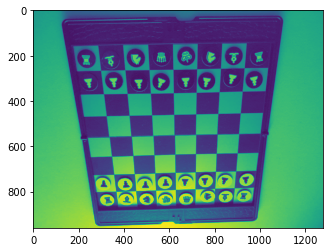

In [171]:
plt.imshow(img)
print(img.shape)

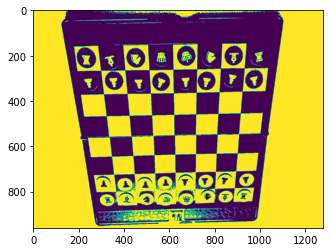

In [172]:

ret,thresh1 = cv2.threshold(img,85,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)

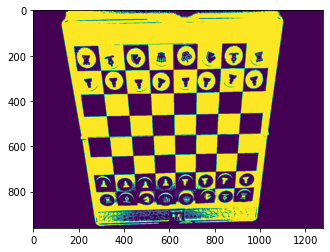

In [173]:
thresh1 = 255-thresh1
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh1)

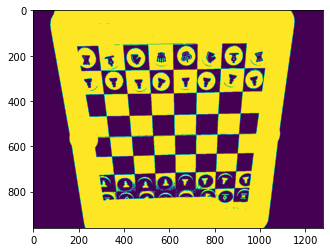

In [177]:
copiaThresh = thresh1.copy()
cv2.drawContours(copiaThresh, contours, -1, (255,0,0),100)
plt.imshow(copiaThresh)

i = 0
contornoFinal = contours[0]
for contorno in contours:
    if len(contorno) > i:
        i = len(contorno)
        contornoFinal = contorno
#procesarContornos(contours)

In [175]:
def obtenerEsquinas(contorno):
    superiorIzq = (0,0)
    inferiorIzq = (0, img.shape[0])
    inferiorDrcha = (img.shape[1], img.shape[0])
    superiorDrcha = (img.shape[1], 0)
    listaEsquinas = [(0,0), (0,0), (0,0), (0,0)]
    superiorIzqActual = 9999
    inferiorIzqActual = 9999
    inferiorDrchaActual = 9999
    superiorDrchaActual = 9999
    for punto in contorno:
        punto = (punto[0][0], punto[0][1])
        distanciaSupIzq = distancia(punto, superiorIzq)
        distanciaInfIzq = distancia(punto, inferiorIzq)
        distanciaInfDrcha = distancia(punto, inferiorDrcha)
        distanciaSupDrcha = distancia(punto, superiorDrcha)
        if distanciaSupIzq < superiorIzqActual:
            listaEsquinas[0] = punto
            superiorIzqActual = distanciaSupIzq
        if distanciaInfIzq < inferiorIzqActual:
            listaEsquinas[1] = punto
            inferiorIzqActual = distanciaInfIzq          
        if distanciaInfDrcha < inferiorDrchaActual:
            listaEsquinas[2] = punto
            inferiorDrchaActual = distanciaInfDrcha
        if distanciaSupDrcha < superiorDrchaActual:
            listaEsquinas[3] = punto
            superiorDrchaActual = distanciaSupDrcha     
    return listaEsquinas

def distancia(p1, p2):
    x,y = p1
    x2,y2 = p2
    return (abs(x2-x) + abs(y2-y))

[(326, 949), (326, 949), (331, 949), (331, 949)]


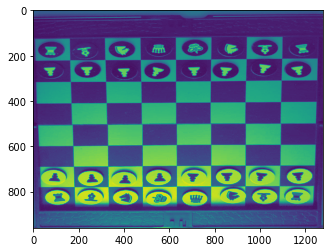

In [176]:
input =  np.float32([obtenerEsquinas(contornoFinal)])
output = np.float32([[0,0],[0, img.shape[0]],[img.shape[1], img.shape[0]],[img.shape[1], 0]])
persp = cv2.getPerspectiveTransform(input, output)
dst = cv2.warpPerspective(img, persp, (img.shape[1],img.shape[0]), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
plt.imshow(dst)